<a href="https://colab.research.google.com/github/gurram46/Clustering-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [89]:
data_df=pd.read_excel("EastWestAirlines.xlsx", skiprows=9)
data_df.head(20)

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...
5,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business cre...
6,note: miles bins:,NaN,NaN,NaN,"1 = under 5,000"
7,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000"
8,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000"
9,NaN,NaN,NaN,NaN,"4 = 25,001 - 50,000"


It looks like data set has multiple sheets so we arèdividing them

In [90]:
pd.ExcelFile("EastWestAirlines.xlsx").sheet_names


['Description', 'data']

They are 2 sheets one has mata data and other has data here description has matadata

In [91]:
data_df=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [92]:
data_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing

In [93]:
data_df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [94]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [95]:
data_df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [96]:
data_df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

# Exploratory Data Analysis (EDA)

To perform EDA we are selecting only relevent columns which are

 'Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'

In [97]:
relevant_columns = ['Balance', 'Bonus_miles', 'Bonus_trans',
                    'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

data_df_relevant = data_df[relevant_columns]


In [98]:
data_df_relevant.describe()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,263685.000000,86.00000,30817.000000,53.000000,8296.00000


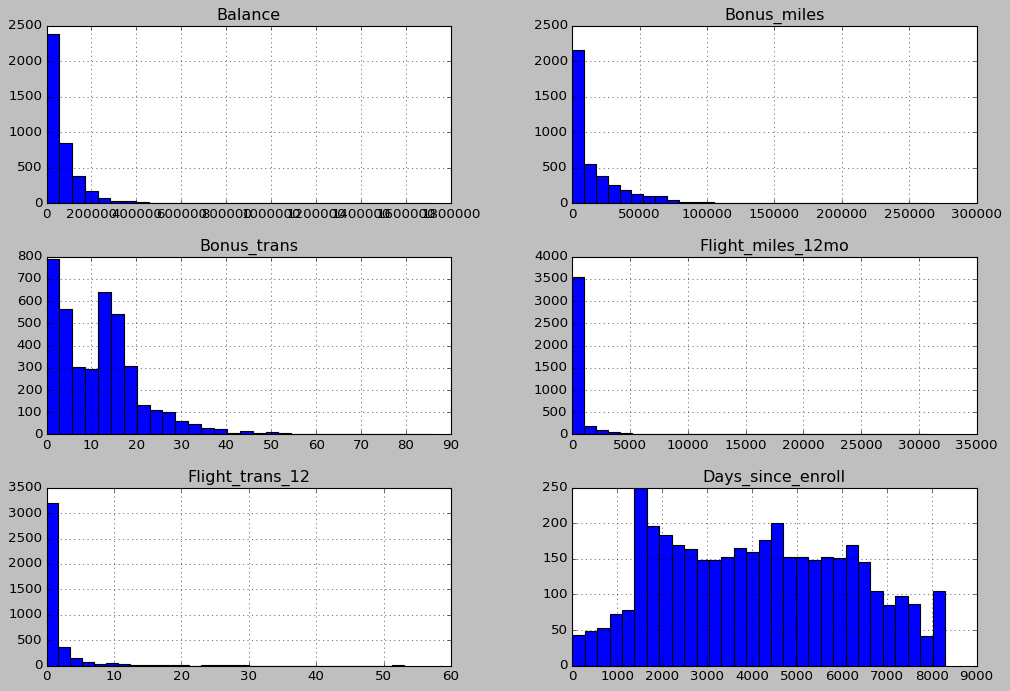

In [99]:
data_df_relevant.hist(bins=30, figsize=(15,10))
plt.show()

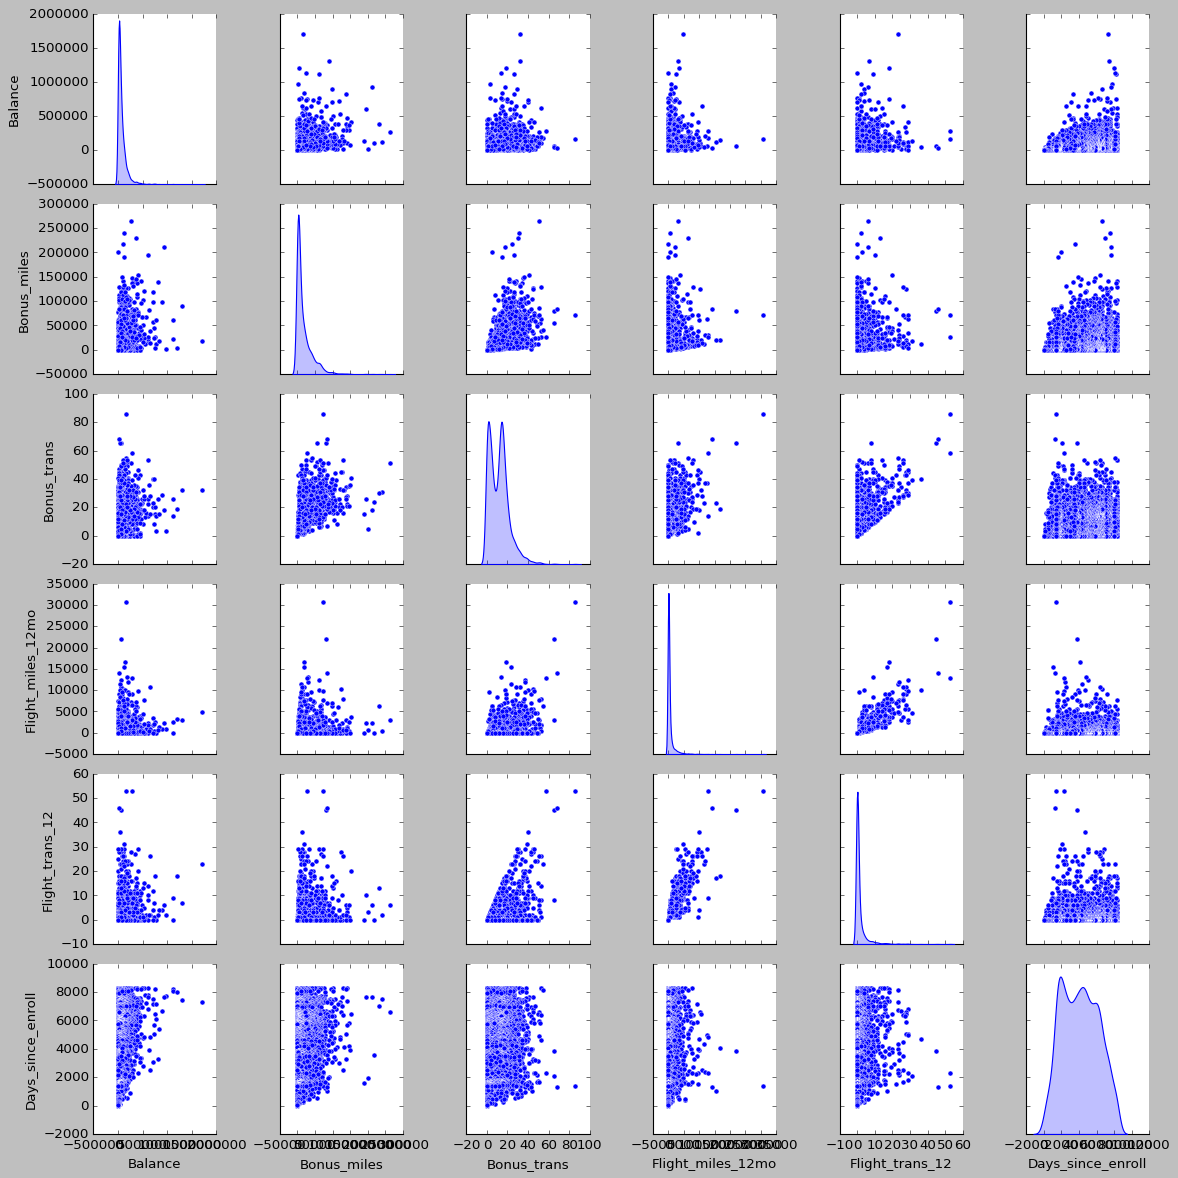

In [100]:
sns.pairplot(data_df_relevant, diag_kind='kde', palette='Set1')
plt.show()


# Outlers Dection & Tretment

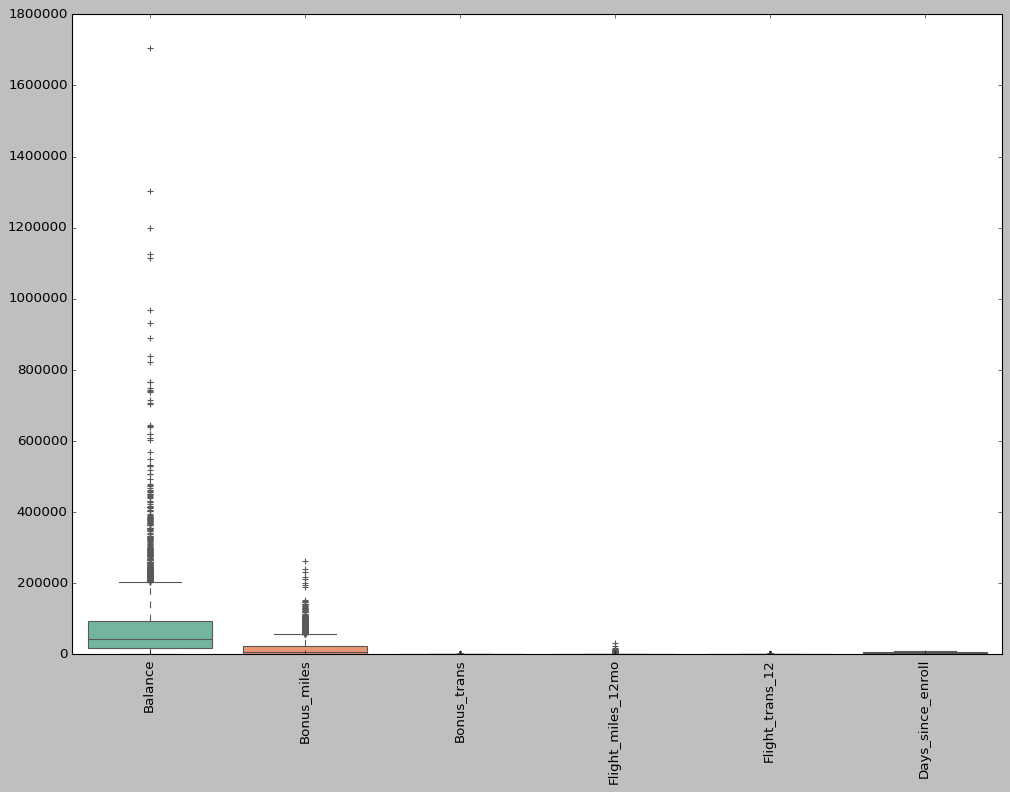

In [101]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_df_relevant,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [102]:
Q1=data_df_relevant.quantile(0.25)
Q3=data_df_relevant.quantile(0.75)
IQR=Q3-Q1

In [103]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [104]:
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

Lower Bound:
 Balance             -92287.25
Bonus_miles         -32575.75
Bonus_trans            -18.00
Flight_miles_12mo     -466.50
Flight_trans_12         -1.50
Days_since_enroll    -2860.75
dtype: float64
Upper Bound:
 Balance              203218.75
Bonus_miles           57626.25
Bonus_trans              38.00
Flight_miles_12mo       777.50
Flight_trans_12           2.50
Days_since_enroll     10981.25
dtype: float64


In [105]:
data_df_capped = data_df_relevant.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

In [106]:
print(data_df_capped.describe())

             Balance   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count    3999.000000   3999.000000  3999.000000        3999.000000   
mean    63768.635784  15410.730683    11.470618         178.055639   
std     58673.700736  18074.733482     9.115104         294.678028   
min         0.000000      0.000000     0.000000           0.000000   
25%     18527.500000   1250.000000     3.000000           0.000000   
50%     43097.000000   7171.000000    12.000000           0.000000   
75%     92404.000000  23800.500000    17.000000         311.000000   
max    203218.750000  57626.250000    38.000000         777.500000   

       Flight_trans_12  Days_since_enroll  
count      3999.000000         3999.00000  
mean          0.591523         4118.55939  
std           0.944826         2065.13454  
min           0.000000            2.00000  
25%           0.000000         2330.00000  
50%           0.000000         4096.00000  
75%           1.000000         5790.50000  
max           2.5

# Normalizing the Data

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler= StandardScaler()

In [109]:
scaled_capped_data = scaler.fit_transform(data_df_capped)

In [110]:
scaled_capped_data_df=pd.DataFrame(scaled_capped_data, columns=data_df_capped.columns)

In [111]:
scaled_capped_data_df

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,1.543191,1.594189,2.034489,2.020176,1.363975
...,...,...,...,...,...,...
3994,-0.772038,-0.381007,-0.819689,0.074478,0.432384,-1.315120
3995,0.010506,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994
3996,0.167530,0.555335,-0.380802,-0.604313,-0.626143,-1.315604
3997,-0.151188,-0.825052,-1.148854,1.092666,0.432384,-1.316088


# Clustering

**K-Means Clustring**

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


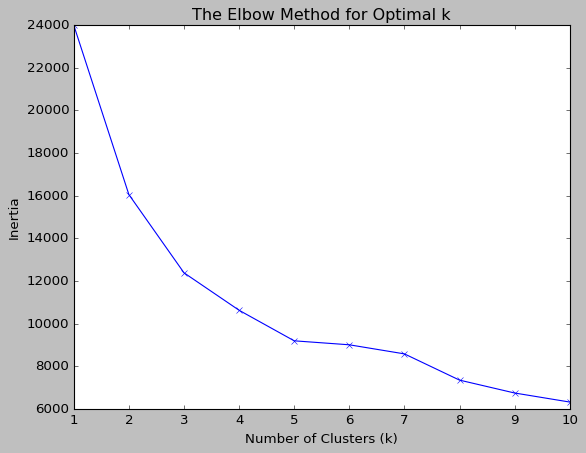

In [113]:
inertia = []
K = range(1,11)

for k in K:
  Kmeans=KMeans(n_clusters=k, random_state=42).fit(scaled_capped_data_df)
  inertia.append(Kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method for Optimal k')
plt.show()

In [114]:
clf = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = clf.fit_predict(scaled_capped_data_df)


In [115]:
kmeans_score = silhouette_score(scaled_capped_data_df, kmeans_clusters)
print(f'K-Means Silhouette Score: {kmeans_score}')


K-Means Silhouette Score: 0.3120206768298262


In [116]:
y_names=clusters=clf.predict(scaled_capped_data_df)

In [117]:
clf.cluster_centers_

array([[ 0.01033951, -0.42176348, -0.2438305 ,  1.49112387,  1.46914969,
        -0.115544  ],
       [-0.59037374, -0.61690679, -0.57871046, -0.57365185, -0.56803676,
        -0.30667306],
       [ 1.164299  ,  1.35032508,  1.46321497,  1.67683189,  1.60296355,
         0.49823854],
       [ 0.6070635 ,  0.83477841,  0.60636948, -0.53483755, -0.50007859,
         0.43427019]])

In [118]:
clf.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [119]:
clf.inertia_

10628.684294873317

In [120]:
md=pd.Series(y_names, name='Cluster')

In [121]:
scaled_capped_data_df['Cluster']=md

In [122]:
scaled_capped_data_df

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.607258,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,1
1,-0.758947,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,1
2,-0.382070,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,1
3,-0.835106,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,1
4,0.579265,1.543191,1.594189,2.034489,2.020176,1.363975,2
...,...,...,...,...,...,...,...
3994,-0.772038,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1
3995,0.010506,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1
3996,0.167530,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1
3997,-0.151188,-0.825052,-1.148854,1.092666,0.432384,-1.316088,0


In [123]:
cluster_means=scaled_capped_data_df.groupby('Cluster').mean()
cluster_means

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,
0,0.010340,-0.421763,-0.243830,1.491124,1.469150,-0.115544
1,-0.590903,-0.617627,-0.580043,-0.573780,-0.568495,-0.308011
2,1.164188,1.350437,1.459866,1.672310,1.597714,0.499900
3,0.603488,0.830799,0.605183,-0.537075,-0.501243,0.433766


In [124]:
plt.style.use('classic')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

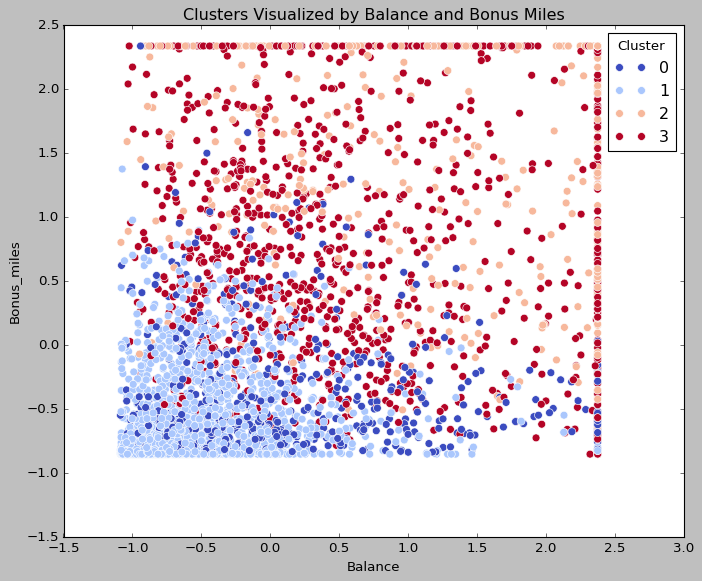

In [125]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_capped_data_df, x='Balance', y='Bonus_miles', hue='Cluster', palette='coolwarm', s=50)
plt.title('Clusters Visualized by Balance and Bonus Miles')
plt.show()


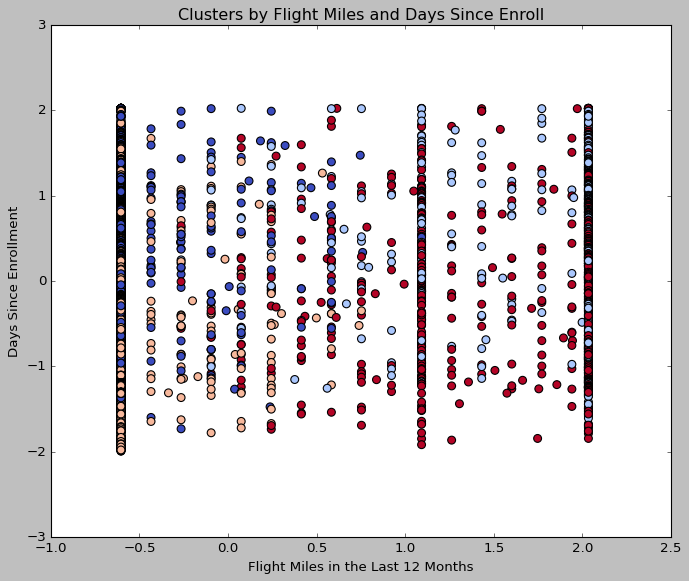

In [126]:
plt.figure(figsize=(10, 8))
plt.scatter(scaled_capped_data_df['Flight_miles_12mo'], scaled_capped_data_df['Days_since_enroll'], c=clf.labels_, s=50, cmap=plt.cm.coolwarm_r)
plt.title('Clusters by Flight Miles and Days Since Enroll')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Days Since Enrollment')
plt.show()


**Hierarchical Clustering**

In [127]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

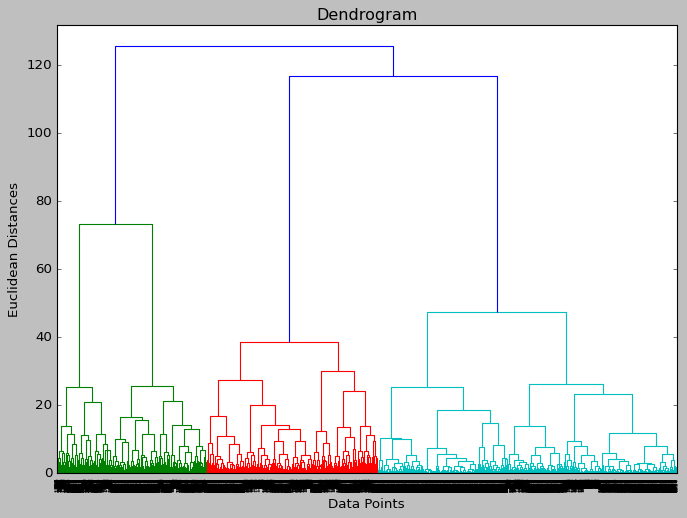

In [128]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_capped_data_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


In [129]:
hc= AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(scaled_capped_data_df)


In [130]:
scaled_capped_data_df['Cluster']=y_hc

In [131]:
scaled_capped_data_df

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.607258,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,0
1,-0.758947,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,0
2,-0.382070,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,0
3,-0.835106,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,0
4,0.579265,1.543191,1.594189,2.034489,2.020176,1.363975,3
...,...,...,...,...,...,...,...
3994,-0.772038,-0.381007,-0.819689,0.074478,0.432384,-1.315120,0
3995,0.010506,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,0
3996,0.167530,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,0
3997,-0.151188,-0.825052,-1.148854,1.092666,0.432384,-1.316088,1


In [132]:
cluster_means=scaled_capped_data_df.groupby('Cluster').mean()
cluster_means

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,
0,-0.590903,-0.617627,-0.580043,-0.573780,-0.568495,-0.308011
1,0.010340,-0.421763,-0.243830,1.491124,1.469150,-0.115544
2,0.649116,0.915702,0.646845,-0.423315,-0.411849,0.428088
3,1.159752,1.215271,1.538870,1.857895,1.831469,0.533388


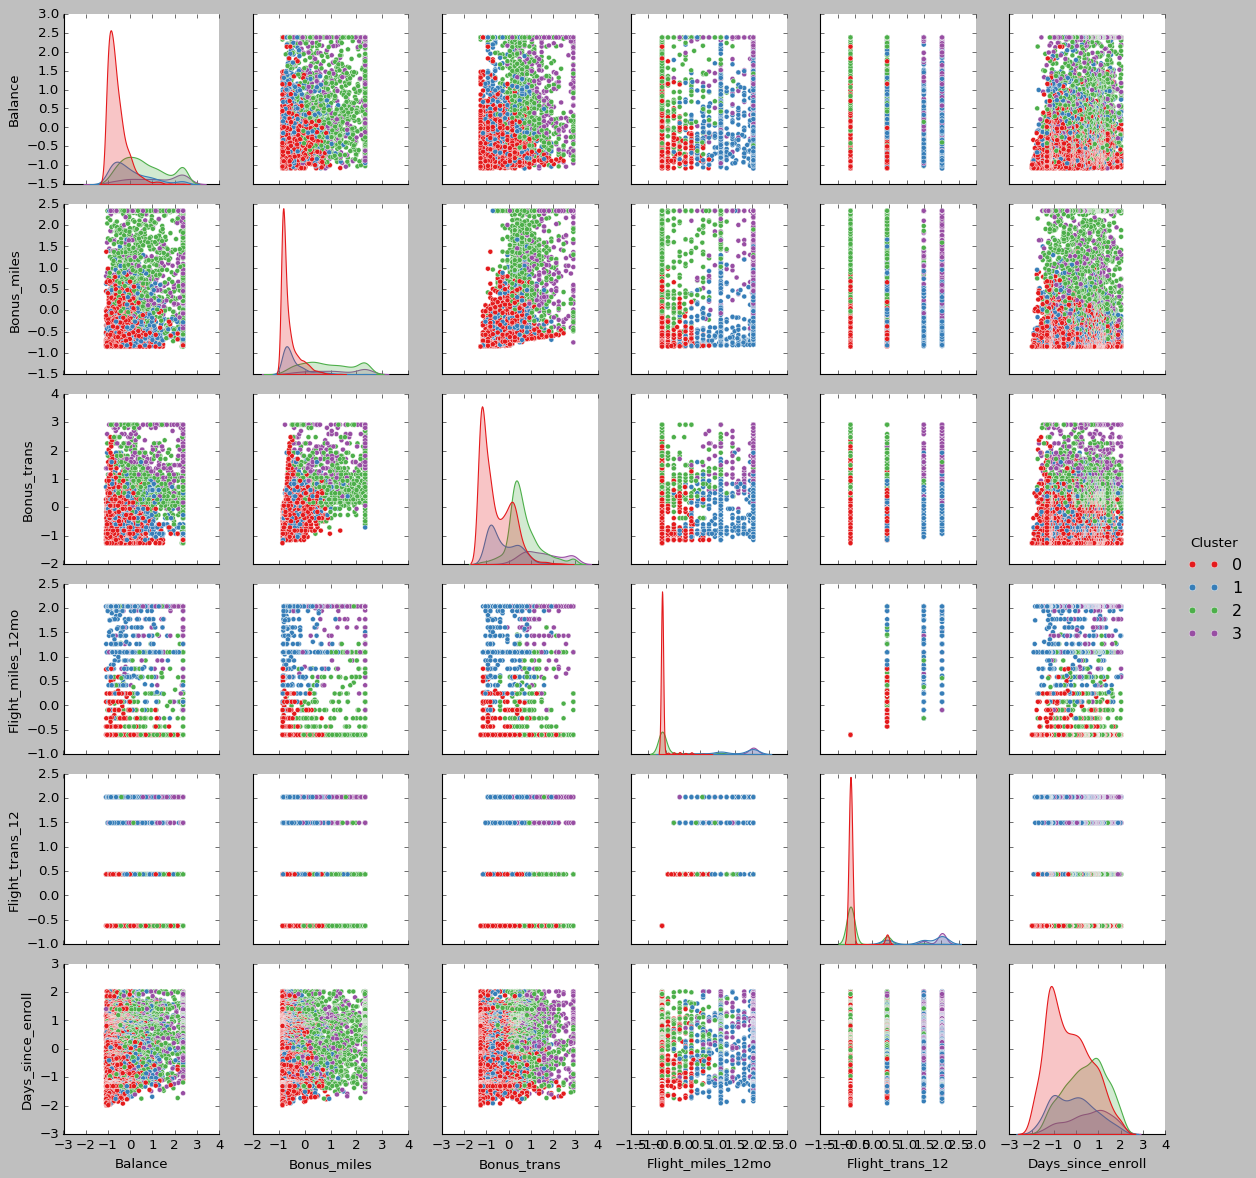

In [133]:
sns.pairplot(scaled_capped_data_df, hue='Cluster', palette='Set1')
plt.show()

In [134]:
hc_score=silhouette_score(scaled_capped_data_df.iloc[:, :-1],y_hc)
print("Silhouette Score:", hc_score)

Silhouette Score: 0.31370223138901154


The silhouette score of 0.3137 for hierarchical clustering indicates a fair separation between clusters.

**DBSCAN Clustering**

In [135]:
from sklearn.cluster import DBSCAN

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_capped_data_df)



In [137]:
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(1, 10)

In [138]:
best_eps = 0
best_min_samples = 0
best_silhouette_score = -1

In [139]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

In [140]:
if len(set(labels))>1:
  score=silhouette_score(scaled_capped_data_df, labels)
  if score>best_silhouette_score:
    best_eps=eps
    best_min_samples=min_samples
    best_silhouette_score=score
print(f'best eps : {best_eps}')
print(f'best min samples: {best_min_samples}')
print(f'best silhouette score: {best_silhouette_score}')

best eps : 1.4000000000000001
best min samples: 9
best silhouette score: 0.21942008796354476


In [141]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

In [142]:
dbscan_clusters = dbscan.fit_predict(scaled_data)

In [143]:
scaled_capped_data_df['DBSCAN_Cluster'] = dbscan_clusters

In [144]:
print(scaled_capped_data_df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    3984
-1      15
Name: count, dtype: int64


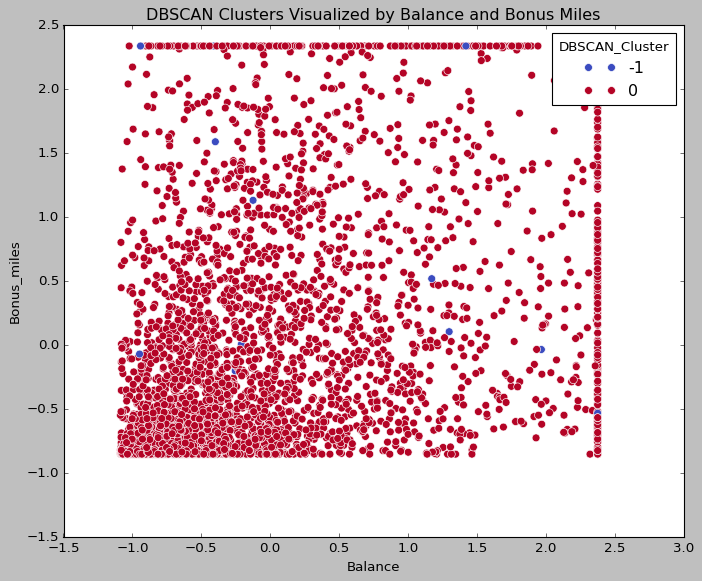

In [145]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_capped_data_df, x='Balance', y='Bonus_miles', hue='DBSCAN_Cluster', palette='coolwarm', s=50)
plt.title('DBSCAN Clusters Visualized by Balance and Bonus Miles')
plt.show()



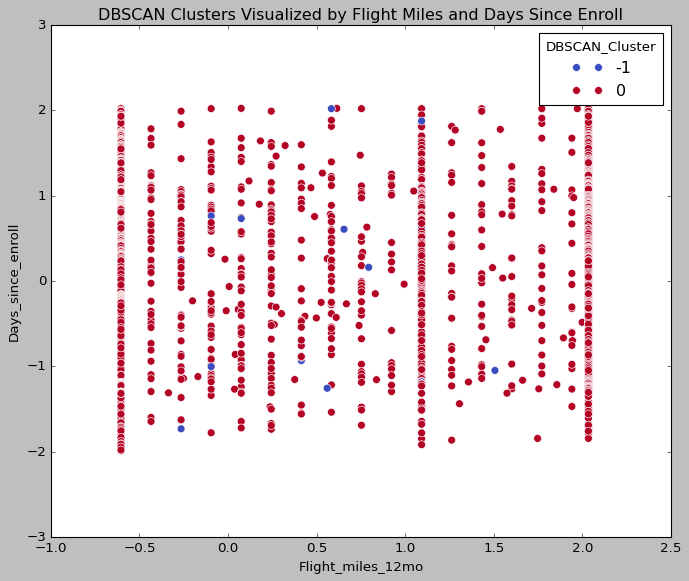

In [146]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_capped_data_df, x='Flight_miles_12mo', y='Days_since_enroll', hue='DBSCAN_Cluster', palette='coolwarm', s=50)
plt.title('DBSCAN Clusters Visualized by Flight Miles and Days Since Enroll')
plt.show()


In [147]:
# Calculate mean values for DBSCAN clusters
dbscan_cluster_means = scaled_capped_data_df.groupby('DBSCAN_Cluster').mean()
print(dbscan_cluster_means)


                 Balance  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                          
-1              0.612028     0.912463     1.828262           0.611968   
 0             -0.002304    -0.003435    -0.006884          -0.002304   

                Flight_trans_12  Days_since_enroll   Cluster  
DBSCAN_Cluster                                                
-1                     1.138070          -0.068168  2.466667  
 0                    -0.004285           0.000257  0.967871  


silhouette score

In [148]:
if len(set(dbscan_clusters)) > 1:
    dbscan_score = silhouette_score(scaled_capped_data_df.iloc[:, :-2], dbscan_clusters)
    print(f'DBSCAN Silhouette Score: {dbscan_score}')
else:
    print('DBSCAN could not find meaningful clusters.')


DBSCAN Silhouette Score: 0.22030312445184305


# Silhouette Scores:

In [149]:
print(f'K-Means Silhouette Score: {kmeans_score}')
print(f'Hierarchical Clustering Silhouette Score: {hc_score}')
print(f'DBSCAN Silhouette Score: {dbscan_score}')


K-Means Silhouette Score: 0.3120206768298262
Hierarchical Clustering Silhouette Score: 0.31370223138901154
DBSCAN Silhouette Score: 0.22030312445184305


# Cluster Characteristics

In [150]:
kmeans_cluster_means=scaled_capped_data_df.groupby('Cluster').mean()
kmeans_cluster_means

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DBSCAN_Cluster
Cluster,,,,,,,
0,-0.590903,-0.617627,-0.580043,-0.573780,-0.568495,-0.308011,0.000000
1,0.010340,-0.421763,-0.243830,1.491124,1.469150,-0.115544,-0.003289
2,0.649116,0.915702,0.646845,-0.423315,-0.411849,0.428088,-0.003623
3,1.159752,1.215271,1.538870,1.857895,1.831469,0.533388,-0.025070


In [151]:
hc_cluster_means=scaled_capped_data_df.groupby('Cluster').mean()
hc_cluster_means

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DBSCAN_Cluster
Cluster,,,,,,,
0,-0.590903,-0.617627,-0.580043,-0.573780,-0.568495,-0.308011,0.000000
1,0.010340,-0.421763,-0.243830,1.491124,1.469150,-0.115544,-0.003289
2,0.649116,0.915702,0.646845,-0.423315,-0.411849,0.428088,-0.003623
3,1.159752,1.215271,1.538870,1.857895,1.831469,0.533388,-0.025070


In [152]:
dbscan_cluster_means=scaled_capped_data_df.groupby('DBSCAN_Cluster').mean()
dbscan_cluster_means

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
DBSCAN_Cluster,,,,,,,
-1,0.612028,0.912463,1.828262,0.611968,1.138070,-0.068168,2.466667
0,-0.002304,-0.003435,-0.006884,-0.002304,-0.004285,0.000257,0.967871


# Key Findings

**Hierarchical Clustering** slightly outperforms **K-Means** in terms of cluster definition but both methods show similar performance overall.

**DBSCAN** is less suited for this dataset in achieving well-defined clusters but is beneficial for identifying noise and outliers.

For well-separated, spherical clusters, K-Means is generally a reliable choice.

**Hierarchical Clustering** offers a hierarchical perspective on the data, making it useful for understanding relationships between clusters.

DBSCAN should be considered when dealing with datasets with varying densities and the need for noise detection

Implications

The clustering analysis reveals that Hierarchical Clustering slightly outperforms K-Means in defining customer clusters, with a silhouette score of 0.3137 compared to K-Means' 0.3120. Despite optimization, DBSCAN, with a silhouette score of 0.2203, remains less effective but is valuable for identifying noise and anomalies. These findings imply that businesses can leverage Hierarchical Clustering for better-defined customer segments, enhancing targeted marketing, resource allocation, and customer retention strategies, while using DBSCAN to manage risks by detecting outliers and unusual behaviors. This comprehensive approach supports data-driven decisions to improve customer satisfaction and business growth.